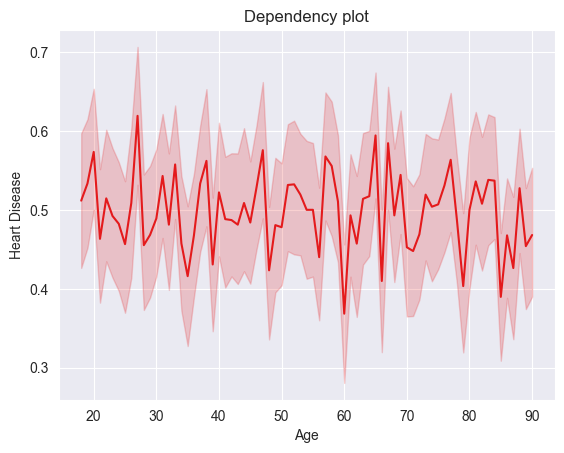

MSE = 0.24996570041704477


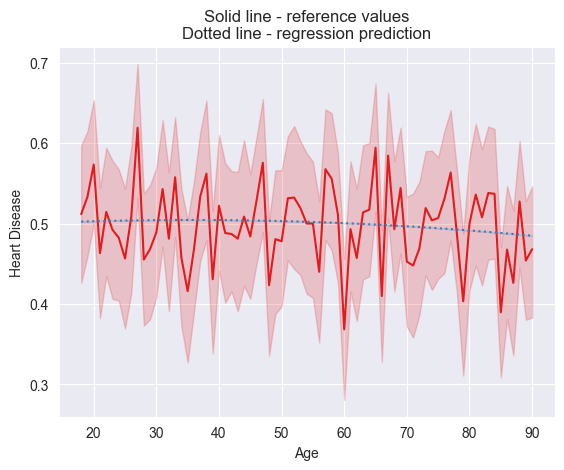

y = 0.4961036123868284 + 0.0004691887562670914x + -6.6022541402669115e-06x^2


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

PATH = './stroke_prediction_dataset.csv'
DATASET_SIZE = 10000
COLUMN_NAME_X='Age'
COLUMN_NAME_Y='Heart Disease'

dataset = pd.read_csv(PATH, index_col=None, encoding="latin-1")
dataset = dataset.head(DATASET_SIZE)

sns.set_style('darkgrid')
sns.set_palette('Set1')


sns.lineplot(
    x=dataset[COLUMN_NAME_X],
    y=dataset[COLUMN_NAME_Y]
)

plt.title('Dependency plot')
plt.xlabel(COLUMN_NAME_X)
plt.ylabel(COLUMN_NAME_Y)

plt.show()

x = np.array(dataset[COLUMN_NAME_X]).reshape(-1, 1)
y = np.array(dataset[COLUMN_NAME_Y]).reshape(-1, 1)

DEGREE = 2

regression = make_pipeline(PolynomialFeatures(DEGREE), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'MSE = {mean_squared_error}')

sns.lineplot(
    x=dataset[COLUMN_NAME_X],
    y=dataset[COLUMN_NAME_Y],
    linestyle="solid"
)

sns.lineplot(
    x=dataset[COLUMN_NAME_X],
    y=predictions.reshape(-1),
    linestyle="dotted"
)

plt.title(
    "Solid line - reference values\n"
    "Dotted line - regression prediction"
)

plt.xlabel(COLUMN_NAME_X)
plt.ylabel(COLUMN_NAME_Y)
plt.show()

x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)

print(f'y = {x_parameters[0]} + {x_parameters[1]}x + {x_parameters[2]}x^2')
